# Pixel Shifting

1. Get all image edges with diff, where
   1. Categorize in to rising (>1) and falling edges (<1)
1. Arrange all edges into a big vector
1. ''Annotate'' the big vector with additional vectors
   - (rising edge)
   - (falling edge)
   - row number
   - 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import c_swain_python_utils as csutils
import imageio
import os
import enum

In [2]:
log = csutils.get_logger(__name__)

In [161]:
test_image = np.zeros((16, 16), dtype=int)
test_image[1:4, :8] = 1
test_image[4, :] = 1
test_image[5:8, 8:] = 1
test_image[8:12, (8-2):(8+2)] = 1
test_image[8:12, (8-1):(8+1)] = 2
test_image[12:,  np.arange(8) * 2] = 1

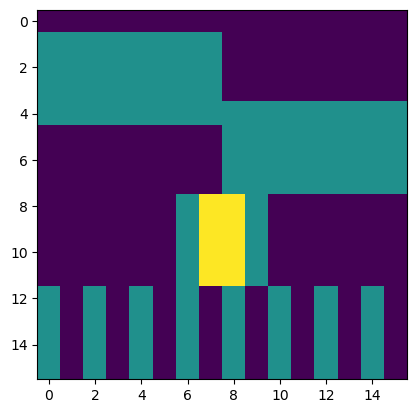

In [163]:
test_image_mini = test_image
plt.imshow(test_image_mini)

[None, None]

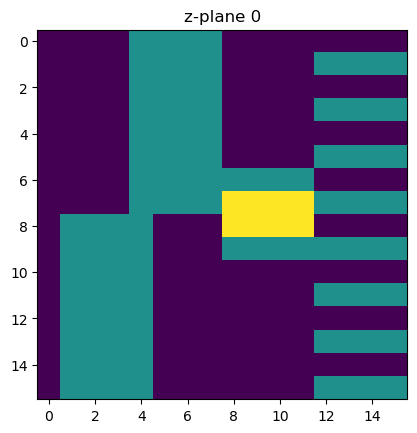

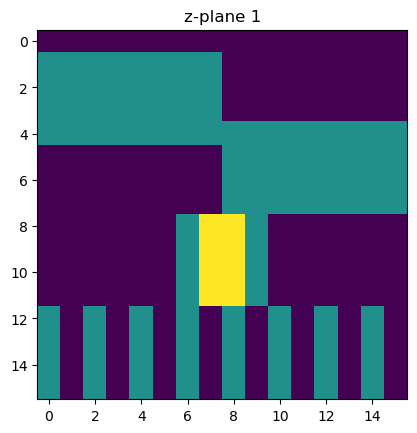

In [8]:
test_image_2 = np.stack([np.rot90(test_image), test_image])
def show(i, title):
    plt.figure()
    plt.title(title)
    plt.imshow(i)
[show(ti, f'z-plane {i:d}') for i, ti in enumerate(test_image_2)]

((2, 16, 16), (2, 16, 16), True)

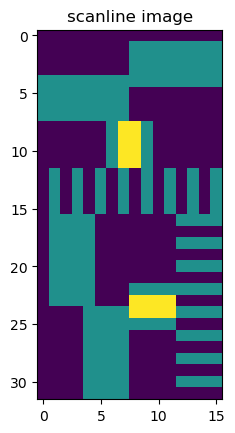

In [9]:
scan_axis = 1
y = np.moveaxis(test_image_2, scan_axis, -1)
move_shape = y.shape
scan_shape = y.shape[-1]
y = y.reshape((-1, scan_shape))
plt.figure()
plt.title('scanline image')
plt.imshow(y)

y_final = y.copy()
y_final = y_final.reshape(move_shape)
y_final = np.moveaxis(y_final, -1, scan_axis)

move_shape, y_final.shape, np.all(test_image_2 == y_final)

In [10]:
x = test_image
diff_arr = np.diff(x.astype(int), axis=1)
diff_arr

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1

In [11]:
edge_index_tup = np.where(diff_arr != 0)
edge_index_tup_vec = tuple(i.ravel() for i in edge_index_tup)
e_row_vec, e_vec = edge_index_tup_vec
e_right_vec = e_vec + 1
e_diff_vec = diff_arr[edge_index_tup_vec]
e_left_val = x[edge_index_tup_vec]
e_right_val = x[e_row_vec, e_right_vec]

print('e_vec, e_row_vec, e_diff_vec, e_left_val, e_right_val')
e_vec, e_row_vec, e_diff_vec, e_left_val, e_right_val

e_vec, e_row_vec, e_diff_vec, e_left_val, e_right_val


(array([ 7,  7,  7,  7,  7,  7,  5,  6,  8,  9,  5,  6,  8,  9,  5,  6,  8,
         9,  5,  6,  8,  9,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,
         1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64),
 array([ 1,  2,  3,  5,  6,  7,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10,
        10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       dtype=int64),
 array([-1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,
        -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
        -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, 

In [12]:
is_re_vec = e_diff_vec > 0
is_fe_vec = np.logical_not(is_re_vec)

print('is_re_vec, is_fe_vec')
is_re_vec, is_fe_vec

is_re_vec, is_fe_vec


(array([False, False, False,  True,  True,  True,  True,  True, False,
        False,  True,  True, False, False,  True,  True, False, False,
         True,  True, False, False, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False]),
 array([ True,  True,  True, False, False, False, False, False,  True,
         True, False, False,  True,  True, False, False,  True,  True,
        False, False,  True,  True,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True,  True, False,  True, False,  True, False,  Tr

In [13]:
cumsum_raw_vec = np.cumsum(e_diff_vec)
cumsum_raw_vec

array([-1, -2, -3, -2, -1,  0,  1,  2,  1,  0,  1,  2,  1,  0,  1,  2,  1,
        0,  1,  2,  1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,
       -1,  0, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1,
       -2, -3, -2, -3, -2, -3, -2, -3, -2, -3, -2, -3, -2, -3, -2, -3, -4,
       -3, -4, -3, -4, -3, -4, -3, -4, -3, -4, -3, -4, -3, -4])

In [14]:
post_row_break_locs = np.where(np.diff(e_row_vec, prepend=-1) > 0)[0]
post_row_break_rows = e_row_vec[post_row_break_locs]
first_row_vals = x[:, 0]

post_row_break_locs, post_row_break_rows, first_row_vals

(array([ 0,  1,  2,  3,  4,  5,  6, 10, 14, 18, 22, 37, 52, 67],
       dtype=int64),
 array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]))

In [15]:
cum_sum_adj = np.repeat(np.nan, e_row_vec.max() + 1)
cum_sum_adj[post_row_break_rows] = (
    1 
    - first_row_vals[post_row_break_rows] 
    - cumsum_raw_vec[post_row_break_locs])
cum_sum_adj = cum_sum_adj.astype(int)
cum_sum_adj

array([-2147483648,           1,           2,           3, -2147483648,
                 3,           2,           1,           0,           0,
                 0,           0,           1,           2,           3,
                 4])

In [16]:
cum_sum_adj_vec = cum_sum_adj[e_row_vec]
cum_sum_adj_vec

array([1, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [17]:
cum_sum_vec = cumsum_raw_vec + cum_sum_adj_vec
e_row_vec, cum_sum_vec, e_right_val

(array([ 1,  2,  3,  5,  6,  7,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10,
        10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       dtype=int64),
 array([0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]))

In [18]:
diff_vec_raw = np.diff(e_vec, append=0)
diff_vec_raw

array([  0,   0,   0,   0,   0,  -2,   1,   2,   1,  -4,   1,   2,   1,
        -4,   1,   2,   1,  -4,   1,   2,   1,  -9,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1, -14,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1, -14,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1, -14,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1, -14], dtype=int64)

In [19]:
pre_row_break_locs = post_row_break_locs[1:] - 1
pre_row_break_locs_reg = np.append(pre_row_break_locs, diff_vec_raw.size - 1)
diff_vec_raw[pre_row_break_locs_reg]

array([  0,   0,   0,   0,   0,  -2,  -4,  -4,  -4,  -9, -14, -14, -14,
       -14], dtype=int64)

In [20]:
widths = diff_vec_raw.copy()
width_row_end_correction = x.shape[1] - e_right_vec[pre_row_break_locs_reg]
widths[pre_row_break_locs_reg] = (
    widths[pre_row_break_locs_reg] 
    + width_row_end_correction 
    - diff_vec_raw[pre_row_break_locs_reg])
width_row_end_correction, widths

(array([8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 1, 1, 1, 1], dtype=int64),
 array([8, 8, 8, 8, 8, 8, 1, 2, 1, 6, 1, 2, 1, 6, 1, 2, 1, 6, 1, 2, 1, 6,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [21]:
region_widths = np.insert(widths, post_row_break_locs, e_right_vec[post_row_break_locs])
region_widths, region_widths.size

(array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 1, 2, 1, 6, 6, 1, 2, 1, 6,
        6, 1, 2, 1, 6, 6, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 96)

(array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0,
        0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0]),
 array([-1,  1, -1,  1, -1,  0,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  0,
         1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  1, -1,  1,
        -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
        -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1]),
 96,
 array([ 0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  6,  7,  9, 10,
         0,  6,  7,  9, 10,  0,  6,  7,  9, 10,  0,  6,  7,  9, 10,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,
       

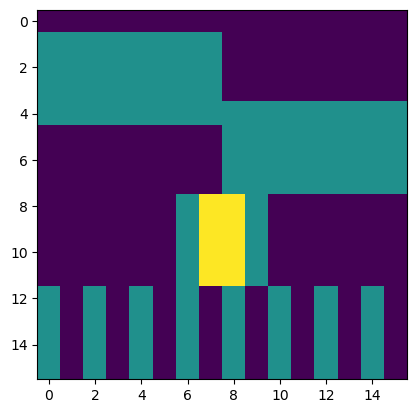

In [22]:
region_vals = np.insert(e_right_val, 
                        post_row_break_locs, 
                        first_row_vals[post_row_break_rows])
region_begin_cols = np.insert(e_right_vec,
                              post_row_break_locs,
                              0)
region_end_cols = region_begin_cols + region_widths - 1
region_rows = np.insert(e_row_vec,
                        post_row_break_locs,
                        post_row_break_rows)
region_delta_trim = np.diff(region_vals)
plt.imshow(test_image)
region_vals, region_delta_trim, region_vals.size, region_begin_cols, region_end_cols, region_rows

In [23]:
post_row_break_locs_reg = (
    post_row_break_locs 
    + np.arange(post_row_break_locs.size))
pre_row_break_locs_reg = post_row_break_locs_reg[1:] - 1
pre_row_break_locs_reg = np.append(
    pre_row_break_locs_reg,
    region_widths.size - 1)
all_row_break_locs_reg = np.concatenate([post_row_break_locs_reg, pre_row_break_locs_reg])
post_row_break_locs_reg, pre_row_break_locs_reg, all_row_break_locs_reg

(array([ 0,  2,  4,  6,  8, 10, 12, 17, 22, 27, 32, 48, 64, 80],
       dtype=int64),
 array([ 1,  3,  5,  7,  9, 11, 16, 21, 26, 31, 47, 63, 79, 95],
       dtype=int64),
 array([ 0,  2,  4,  6,  8, 10, 12, 17, 22, 27, 32, 48, 64, 80,  1,  3,  5,
         7,  9, 11, 16, 21, 26, 31, 47, 63, 79, 95], dtype=int64))

Want to categorize every region into
* well
* step
* plateau

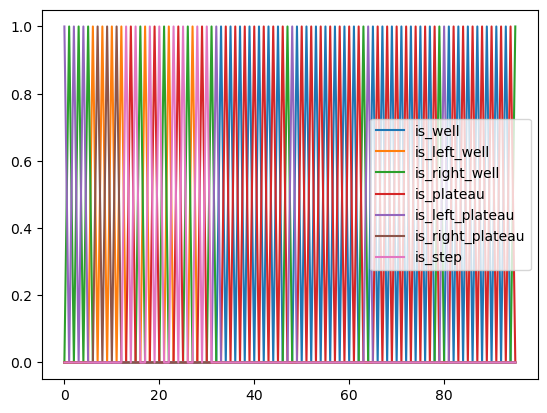

In [24]:
rising_edge_trim = region_delta_trim > 0
is_left_rising = np.insert(rising_edge_trim, 0, False)
is_right_rising = np.append(rising_edge_trim, False)
is_left_falling = np.logical_not(is_left_rising)
is_right_falling = np.logical_not(is_right_rising)

is_center_well = np.logical_and(is_left_falling, is_right_rising)
is_center_well[all_row_break_locs_reg] = False
is_left_well = np.zeros(is_center_well.shape, dtype=bool)
is_left_well[post_row_break_locs_reg] = is_right_rising[post_row_break_locs_reg]
is_right_well = np.zeros(is_center_well.shape, dtype=bool)
is_right_well[pre_row_break_locs_reg] = is_left_falling[pre_row_break_locs_reg]
is_center_plateau = np.logical_and(is_left_rising, is_right_falling)
is_center_plateau[all_row_break_locs_reg] = False
is_left_plateau = np.zeros(is_center_well.shape, dtype=bool)
is_left_plateau[post_row_break_locs_reg] = np.logical_not(
    is_left_well[post_row_break_locs_reg])
is_right_plateau = np.zeros(is_center_well.shape, dtype=bool)
is_right_plateau[pre_row_break_locs_reg] = np.logical_not(
    is_right_well[pre_row_break_locs_reg])
is_step = np.logical_or(
    np.logical_and(is_left_falling, is_right_falling),
    np.logical_and(is_left_rising, is_right_rising))
is_step[all_row_break_locs_reg] = False
plt.plot(is_center_well, label='is_well')
plt.plot(is_left_well, label='is_left_well')
plt.plot(is_right_well, label='is_right_well')
plt.plot(is_center_plateau, label='is_plateau')
plt.plot(is_left_plateau, label='is_left_plateau')
plt.plot(is_right_plateau, label='is_right_plateau')
plt.plot(is_step, label='is_step')
plt.legend()

Identified 32 region(s) w/ pixel value > 0 which will be lost when performing the pixel shift because the region(s) have width <= 3 pixels. This is too narrow given the supplided shift parameters (rising_edge_shift=1, falling_edge_shift=-2). Note that adjacent pixel regions may be lost or clipped as well.
Failed Regions located at the following pixel locations [row, cols]:
   0: [   8,    7:8   ], width =    2
   1: [   9,    7:8   ], width =    2
   2: [  10,    7:8   ], width =    2
   3: [  11,    7:8   ], width =    2
   4: [  12,    2:2   ], width =    1
   5: [  12,    4:4   ], width =    1
   6: [  12,    6:6   ], width =    1
   7: [  12,    8:8   ], width =    1
   8: [  12,   10:10  ], width =    1
   9: [  12,   12:12  ], width =    1
  10: [  12,   14:14  ], width =    1
  11: [  13,    2:2   ], width =    1
  12: [  13,    4:4   ], width =    1
  13: [  13,    6:6   ], width =    1
  14: [  13,    8:8   ], width =    1
  15: [  13,   10:10  ], width =    1
  16: [  13,   1

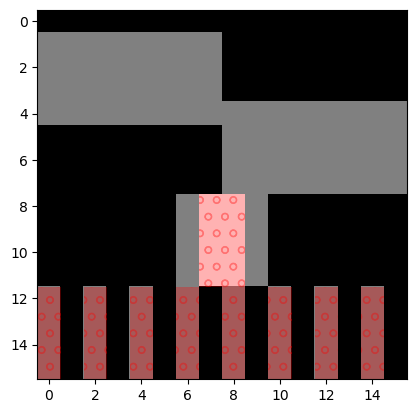

In [208]:
rising_shift = 1
falling_shift = -2

safe_center_plateau_width = rising_shift - falling_shift
safe_center_well_width = -safe_center_plateau_width
safe_right_plateau_width = rising_shift
safe_left_plateau_width = -falling_shift
safe_right_well_width = -safe_right_plateau_width
safe_left_well_width = -safe_left_plateau_width

checks = [
    (safe_center_plateau_width, is_center_plateau, 'region(s) w/ pixel value > 0'),
    (safe_center_well_width, is_center_well, 'zero-valued region(s)'),
    (safe_right_plateau_width, is_right_plateau, 'right edge region(s) w/ pixel value > 0'),
    (safe_left_plateau_width, is_left_plateau, 'left edge region(s) w/ pixel value > 0'),
    (safe_right_well_width, is_right_well, 'right edge zero-valued region(s)'),
    (safe_left_well_width, is_left_well, 'left edge zero-valued region(s) > 0')]
    
plt.imshow(x, cmap='gray')
    
for safe_w, mask, msg in checks:
    if safe_w <= 0:
        continue
        
    failed_regions = region_widths[mask] <= safe_w
    if not np.any(failed_regions):
        continue
        
    print(f'Identified {np.sum(failed_regions)} {msg} which will be' 
          f' lost when performing the pixel shift because the region(s) have'
          f' width <= {safe_w} pixels. This is too narrow given the supplided'
          f' shift parameters (rising_edge_shift={rising_shift},'
          f' falling_edge_shift={falling_shift}). Note that adjacent pixel'
          f' regions may be lost or clipped as well.')
    print('Failed Regions located at the following pixel locations [row, cols]:')
    fail_col_begin = region_begin_cols[mask][failed_regions]
    fail_col_end = region_end_cols[mask][failed_regions]
    fail_row = region_rows[mask][failed_regions]
    fail_width = region_widths[mask][failed_regions]
    [print(f'{i:4d}: [{r:4d}, {stt:4d}:{stp:<4d}], width = {w:4d}') 
     for i, (r, stt, stp, w) in
     enumerate(zip(fail_row.tolist(),
                   fail_col_begin.tolist(),
                   fail_col_end.tolist(),
                   fail_width.tolist()))]
    
    highlights = [mpl.patches.Rectangle((stt-0.5, r-0.5), w, 1)
                  for stt, r, w in zip(fail_col_begin.tolist(),
                                       fail_row.tolist(),
                                       fail_width.tolist())]
    hlpc = mpl.collections.PatchCollection(highlights,
                                           facecolor='r',
                                           alpha=0.3,
                                           lw=0,
                                           edgecolor='r',
                                           hatch='o')
                                           
    ax = plt.gca()
    ax.add_collection(hlpc)
    
    

In [26]:
left_region_edges = region_begin_cols
right_region_edges = region_end_cols
is_left_edge_shiftable = left_region_edges > 0
is_right_edge_shiftable = right_region_edges < (x.shape[1] - 1)

new_left_region_edges = left_region_edges.copy()
new_left_region_edges[is_left_rising & is_left_edge_shiftable] += rising_shift
new_left_region_edges[is_left_falling & is_left_edge_shiftable] += falling_shift
new_right_region_edges = right_region_edges.copy()
new_right_region_edges[is_right_rising & is_right_edge_shiftable] += rising_shift
new_right_region_edges[is_right_falling & is_right_edge_shiftable] += falling_shift

new_left_region_edges = np.clip(new_left_region_edges, 0, x.shape[1] - 1)
new_right_region_edges = np.clip(new_right_region_edges, 0, x.shape[1] - 1)

new_region_widths = new_right_region_edges - new_left_region_edges
new_left_region_edges, new_right_region_edges, new_region_widths

(array([ 0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  6,  7,  9, 10,
         0,  6,  7,  9, 10,  0,  6,  7,  9, 10,  0,  6,  7,  9, 10,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int64),
 array([ 7, 15,  7, 15,  7, 15,  7, 15,  7, 15,  7, 15,  5,  6,  8,  9, 15,
         5,  6,  8,  9, 15,  5,  6,  8,  9, 15,  5,  6,  8,  9, 15,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int64),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 0, 1, 0, 5, 5, 0, 1, 0, 5,
        5, 0, 1, 0, 5, 5, 0, 1, 

In [27]:
valid_regions = (
    (new_region_widths > 0) & 
    (new_left_region_edges >= 0) &
    (new_left_region_edges < x.shape[1]) &
    (new_right_region_edges >= 0) &
    (new_right_region_edges < x.shape[1]))
new_left_region_edges_valid = new_left_region_edges[valid_regions]
new_right_region_edges_valid = new_right_region_edges[valid_regions]

region_vals_valid = region_vals[valid_regions]
region_rows_valid = region_rows[valid_regions]

valid_regions, new_left_region_edges_valid, new_right_region_edges_valid, region_vals_valid, region_rows_valid

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True, False,  True,  True,
        False,  True, False,  True,  True, False,  True, False,  True,
         True, False,  True, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([ 0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  7, 10,  0,  7,
        10,  0,  7, 10,  0,  7, 10], dtype=int64),
 array([ 7, 15,  7, 15,  7, 15,  7, 15,  7, 15,  7, 15,  5,  8, 15,  5,  8,
        15,  5,  8, 15,  5,  8, 15]

In [28]:
raveled_left_edges = np.ravel_multi_index(
    (region_rows_valid, new_left_region_edges_valid), 
    x.shape)
raveled_right_edges = (
    np.ravel_multi_index(
        (region_rows_valid, new_right_region_edges_valid), 
        x.shape) 
    + 1)

region_vals, raveled_left_edges, raveled_right_edges

(array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0,
        0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0]),
 array([ 16,  24,  32,  40,  48,  56,  80,  88,  96, 104, 112, 120, 128,
        135, 138, 144, 151, 154, 160, 167, 170, 176, 183, 186], dtype=int64),
 array([ 24,  32,  40,  48,  56,  64,  88,  96, 104, 112, 120, 128, 134,
        137, 144, 150, 153, 160, 166, 169, 176, 182, 185, 192], dtype=int64))

In [29]:
def vrange(starts, stops):
    """Create concatenated ranges of integers for multiple start/stop

    Parameters:
        starts (1-D array_like): starts for each range
        stops (1-D array_like): stops for each range (same shape as starts)

    Returns:
        numpy.ndarray: concatenated ranges

    For example:

        >>> starts = [1, 3, 4, 6]
        >>> stops  = [1, 5, 7, 6]
        >>> vrange(starts, stops)
        array([3, 4, 4, 5, 6])

    """
    stops = np.asarray(stops)
    l = stops - starts # Lengths of each range.
    return np.repeat(stops - l.cumsum(), l) + np.arange(l.sum())

In [30]:
rep_lengths = raveled_right_edges - raveled_left_edges
sel = (np.repeat(raveled_right_edges - rep_lengths.cumsum(), rep_lengths)
       + np.arange(rep_lengths.sum()))
val = np.repeat(region_vals_valid, rep_lengths)
rep_lengths, sel, val

(array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 2, 6, 6, 2, 6, 6, 2, 6, 6,
        2, 6], dtype=int64),
 array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  63,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136,
        138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151,
        152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
        167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 183, 184, 186, 187, 188, 189, 190, 191], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 

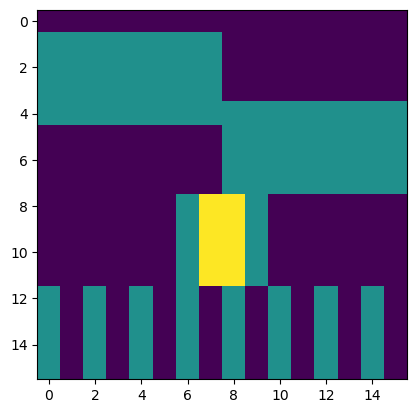

In [31]:
new_x = x.copy().ravel()
new_x[sel] = val
new_x = new_x.reshape(x.shape)
plt.imshow(new_x)

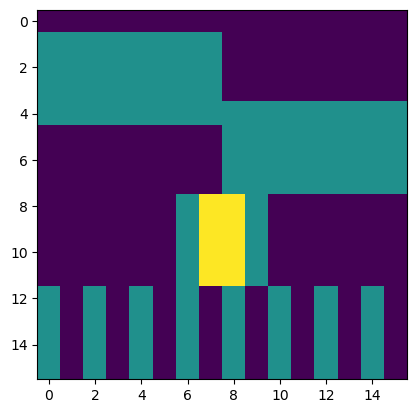

In [32]:
new_x = x.copy().ravel()
iterator = zip(raveled_left_edges.tolist(),
               raveled_right_edges.tolist(),
               region_vals_valid.tolist())
for le, re, val in iterator:
    selection = np.arange(le, re)
    new_x[selection] = val

new_x = new_x.reshape(x.shape)
plt.imshow(new_x)

In [19]:
class RegionType(enum.IntEnum):
    NONE = 0
    START_PLATEAU = enum.auto()
    END_PLATEAU = enum.auto()
    START_WELL = enum.auto()
    END_WELL = enum.auto()
    CENTER_PLATEAU = enum.auto()
    CENTER_WELL = enum.auto()
    CENTER_STEP = enum.auto()
    
    @classmethod
    def to_width_cutoff(cls, type_arr, rising_edge_shift, falling_edge_shift):
        out_arr = np.zeros(type_arr.shape, dtype=int)
        out_arr[type_arr == cls.START_PLATEAU] = -falling_edge_shift
        out_arr[type_arr == cls.END_PLATEAU] = rising_edge_shift
        out_arr[type_arr == cls.START_WELL] = -rising_edge_shift
        out_arr[type_arr == cls.END_WELL] = falling_edge_shift
        out_arr[type_arr == cls.CENTER_PLATEAU] = (rising_edge_shift 
                                                   - falling_edge_shift)
        out_arr[type_arr == cls.CENTER_WELL] = (falling_edge_shift
                                                - rising_edge_shift)
        return out_arr
    


def _start_pos_to_end_pos(start_pos,
                          break_locs,
                          line_length):
    
    # compute the end (not inclusive) position of each region
    # by shifting the start position vector
    end_pos = start_pos.copy()
    end_pos[break_locs] = line_length
    return np.append(end_pos[1:], line_length)


@csutils.timed(log)
def shift_pixel_edges(x, 
                      scan_axis=-1, 
                      *, 
                      rising_edge_shift, 
                      falling_edge_shift, 
                      warn=True,
                      reverse_scan_direction=False,
                      do_plot_results=True):
    
    # move scan axis to the final axis
    x = np.moveaxis(x, scan_axis, -1)
    moveax_shape = x.shape
    scanline_length = moveax_shape[-1]
    
    # reshape to have scan axis along axis 1 and all other dims along axis 0
    x = x.reshape((-1, scanline_length)) 
    if do_plot_results:
        x_compare = x
    all_lines_shape = x.shape
    num_scanlines = all_lines_shape[0]
    
    # flip processed array if using a reversed scan direction
    # i.e. scanning from scanline position -1 to position 0
    if reverse_scan_direction:
        x = np.fliplr(x)
    
    log.debug('Shifting pixel edges for %d scanlines,'
              ' each scanline has length %d.',
              num_scanlines, scanline_length)
    
    # use np.diff() along the scan direction to determine where all changes 
    # in value occur. Note that lines with no changes in value will not be
    # considered in the following computations
    diffs = np.diff(x, axis=-1)
    edge_index_tup = np.where(diffs != 0)
    raw_edge_line_ind, raw_edge_pos = edge_index_tup
    
    # indexes where scanline breaks occur in the raw_edge_pos vector
    (line_break_locs_raw, ) = np.where(
        np.diff(raw_edge_line_ind, prepend=-1) != 0)
    
    # convert from the raw edge position to a vector of every "left" edge
    # where either a pixel value changes or a scanline begins
    region_start_pos = raw_edge_pos + 1
    region_start_pos = np.insert(region_start_pos, 
                                 line_break_locs_raw, 
                                 0)
    # number of identified regions
    num_regions = region_start_pos.size
    log.debug('Identified %d regions across all hetrogenously'
              '-valued scanlines.', num_regions)
    
    # the vector index of the beginnin of each scanline break
    (line_break_locs, ) = np.where(region_start_pos == 0)
    
    # the index of the line corrresponding to each region
    region_line_ind = np.insert(raw_edge_line_ind,
                                line_break_locs_raw,
                                raw_edge_line_ind[line_break_locs_raw])
    
    # extract the pixel value for each region
    region_vals = x[region_line_ind, region_start_pos]

    if warn:
        region_end_pos = _start_pos_to_end_pos(
            region_start_pos, line_break_locs, scanline_length)        
        region_widths = region_end_pos - region_start_pos        
        
        line_start_locs = line_break_locs
        line_end_locs = np.append(line_break_locs[1:] - 1, 
                                  num_regions - 1)
        
        line_start_filt = np.zeros((num_regions, ), dtype=bool)
        line_start_filt[line_start_locs] = True
        line_end_filt = np.zeros((num_regions, ), dtype=bool)
        line_end_filt[line_end_locs] = True
        
        end_diff = np.diff(region_vals, n=1, prepend=0)
        start_diff = np.diff(region_vals, n=1, append=0)
        ddiff = start_diff - end_diff
        
        region_class = np.zeros((num_regions, ), dtype=RegionType)
        region_class[ddiff == 0] = RegionType.CENTER_STEP
        region_class[ddiff > 0] = RegionType.CENTER_WELL
        region_class[ddiff < 0] = RegionType.CENTER_PLATEAU
        region_class[line_end_filt 
                     & (end_diff > 0)] = RegionType.END_PLATEAU
        region_class[line_end_filt 
                     & (end_diff < 0)] = RegionType.END_WELL
        region_class[line_start_filt 
                     & (start_diff > 0)] = RegionType.START_WELL
        region_class[line_start_filt 
                     & (start_diff < 0)] = RegionType.START_PLATEAU
        
        width_cutoffs = RegionType.to_width_cutoff(
            region_class,
            rising_edge_shift=rising_edge_shift,
            falling_edge_shift=falling_edge_shift)
        lost_regions = region_widths <= width_cutoffs
        
        if np.any(lost_regions):
            num_lost_regions = np.sum(lost_regions)
            log.warning('%d scanline region(s) will be lost when performing pixel' 
                        ' shifts because the region\'s width is too narrow.',
                        num_lost_regions)
            
            fail_start_pos = region_start_pos[lost_regions]
            fail_line_ind = region_line_ind[lost_regions]
            fail_region_width = region_widths[lost_regions]
            
            plt.figure(figsize=(10, 10))
            plt.imshow(x, cmap='gray')
            highlights = [
                mpl.patches.Rectangle((stt-0.5, l-0.5), w, 1)
                for stt, l, w in zip(fail_start_pos,
                                     fail_line_ind,
                                     fail_region_width)]
            patch_props = dict(
                facecolor='r',
                alpha=0.4,
                lw=1,
                edgecolor='r',
                hatch='x')
            hlpc = mpl.collections.PatchCollection(
                highlights, **patch_props)
            p = mpl.patches.Patch(**patch_props,
                                  label='lost regions')
            
            default_viewport = 75
            y_lims = [
                np.max([np.min(fail_line_ind) - (default_viewport / 2), -0.5]),
                np.min([np.max(fail_line_ind) 
                        + (default_viewport / 2), num_scanlines + 0.5])]
            x_lims = [
                np.max([np.min(fail_start_pos) - (default_viewport / 2), -0.5]),
                np.min([np.max(fail_start_pos + fail_region_width) 
                        + (default_viewport / 2), num_scanlines + 0.5])]
            if reverse_scan_direction:
                x_lims = np.flip(np.array(x_lims))
                x_label_addn = ', Reversed'
            else:
                x_label_addn = ''
            plt.xlim(x_lims)
            plt.ylim(np.flip(np.array(y_lims)))
        
            plt.xlabel(f'Scanline Position{x_label_addn} (pixel)')
            plt.ylabel('Scanline Index (a.u.)')    
            plt.title('WARNING: The highlighted region(s) will'
                      ' be lost when performing pixel shifts.')
            plt.legend(handles=[p])
            ax = plt.gca()   
            ax.add_collection(hlpc)
    
    # compute the change from value to value across regions to classify the
    # edge type
    region_val_diff = np.diff(region_vals, prepend=0)
    
    # mask for rising edge, falling, edge, and positions which can be
    # validly shifted
    is_pos_rising = region_val_diff > 0
    is_pos_falling = np.logical_not(is_pos_rising)
    is_pos_shiftable = np.ones((num_regions, ), dtype=bool)
    is_pos_shiftable[line_break_locs] = False
    
    # If the position is determined to be a rising edge AND can be
    # validly shifted, then shift by the parametrized amount. Similarly
    # for the falling edge.
    new_region_start_pos = region_start_pos.copy()
    rise_filt = is_pos_rising & is_pos_shiftable
    new_region_start_pos[rise_filt] += rising_edge_shift
    fall_filt = np.logical_not(is_pos_rising) & is_pos_shiftable
    new_region_start_pos[fall_filt] += falling_edge_shift
    new_region_start_pos = np.clip(new_region_start_pos, 0, scanline_length)
    
    # new end position is computed
    new_region_end_pos = _start_pos_to_end_pos(
        new_region_start_pos, line_break_locs, scanline_length) 
    
    # compute the new region widths after perfoming shifts
    new_region_widths = new_region_end_pos - new_region_start_pos
    
    # subset each of the following variabled to only retain values where
    # the modified region has a positive width
    valid_regions = new_region_widths > 0
    v_region_line_ind = region_line_ind[valid_regions]
    v_region_start_pos = new_region_start_pos[valid_regions]
    v_region_vals = region_vals[valid_regions]
    v_region_widths = new_region_widths[valid_regions]
    
    # convert the line-index and scanline-position-index
    # into linear indexes
    raveled_region_start_pos = np.ravel_multi_index(
        (v_region_line_ind, v_region_start_pos), 
        all_lines_shape)
    raveled_region_end_pos = (raveled_region_start_pos 
                              + v_region_widths)
    
    # the following lines implement a vectorized np.arange() with two vectors
    # of corresponding starts and stops and the output assembled into a
    # single concatenated vector of the results
    repeat_lengths = raveled_region_end_pos - raveled_region_start_pos
    vector_arange = (
        np.repeat(raveled_region_end_pos - repeat_lengths.cumsum(), 
                  repeat_lengths)
        + np.arange(repeat_lengths.sum()))
    # region values are repeated to match the raveled and aranged indexes
    updated_values = np.repeat(v_region_vals, repeat_lengths)
    
    # finally we will update the input ndarray with the new regions
    x_prime = x.copy().ravel()
    x_prime[vector_arange] = updated_values
    
    # reshape and transform the output to that of the original input
    x_prime = x_prime.reshape((-1, scanline_length))
    if reverse_scan_direction:
        x_prime = np.fliplr(x_prime)            
     
    if do_plot_results:
        fig = plt.figure(figsize=(10, 10))
        ax = plt.gca()
        ax.imshow(x_prime, cmap='gray')
        im_diff = x_prime.astype(float) - x_compare.astype(int)
        im_diff[im_diff < 0] = -1
        im_diff[im_diff > 0] = 1
        is_diff = im_diff != 0
        cmap = mpl.colormaps['PiYG']
        ax.imshow(im_diff, 
                  cmap=cmap, 
                  alpha=is_diff.astype(float),
                  vmin=-1, 
                  vmax=1)
        ax.set_xlabel('Scanline Position (pixel)')
        ax.set_ylabel('Scanline Index (a.u.)')    
        ax.set_title(f'Result of pixel shift with changes highlighted\n'
                     f'(rising_edge_shift = {rising_edge_shift:+d},'
                     f' falling_edge_shift = {falling_edge_shift:+d})')
        p0 = mpl.patches.Patch(color=cmap(0.0), label='removed/decreased')
        p1 = mpl.patches.Patch(color=cmap(1.0), label='added/increased')
        ax.legend(handles=[p0, p1], 
                  title='Changed Regions', 
                  framealpha=0.9)
        plt.show()

    x_prime = x_prime.reshape(moveax_shape)  
    return np.moveaxis(x_prime, -1, scan_axis)

  __main__ :      DEBUG : Shifting pixel edges for 512 scanlines, each scanline has length 512.
  __main__ :      DEBUG : Identified 2630 regions across all hetrogenously-valued scanlines.
  __main__ :    WARNING : 2 scanline region(s) will be lost when performing pixel shifts because the region's width is too narrow.


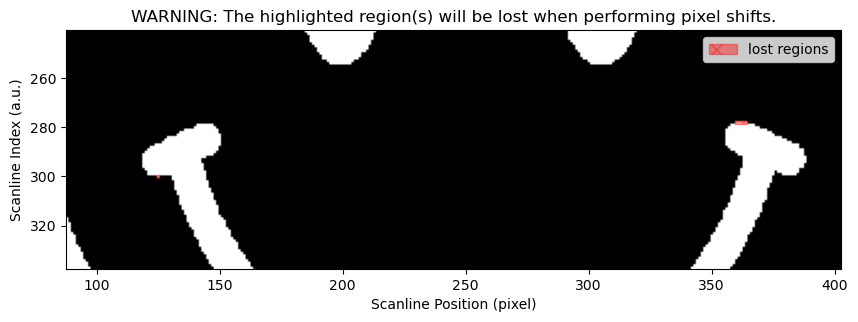

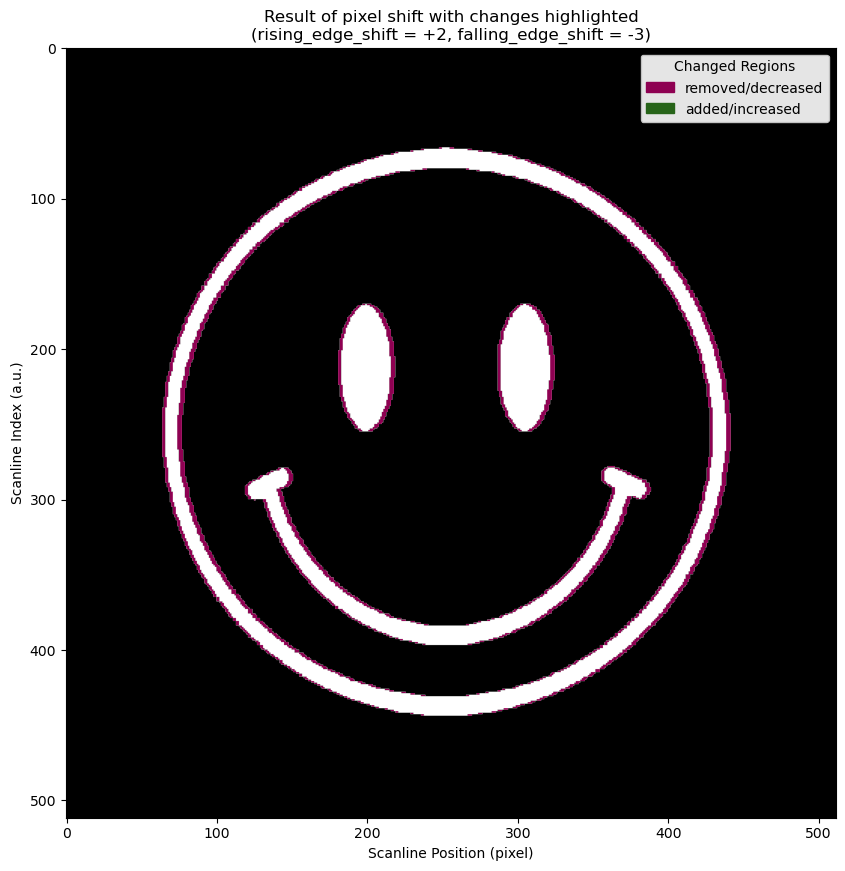

  __main__ :       INFO : shift_pixel_edges took 0:00:00.698880 h:m:s.


In [22]:
file_name = 'test_2d_smile.tif'
data_dir = os.path.join('data', 'examples')
file_path = os.path.join(data_dir, file_name)
test_image = imageio.v3.imread(file_path)

new_im = shift_pixel_edges(test_image, 
                           rising_edge_shift=2, 
                           falling_edge_shift=-3,
                           reverse_scan_direction=False)